In [92]:
import pandas as pd
import numpy as np
import swifter
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import operator
import data_prep as d
import functions as f
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.utils import resample
from yellowbrick.classifier import ConfusionMatrix
from imblearn.over_sampling import SMOTE
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
X, y = d.clean_1_5()

Upload
y_clean
column_drop
null_value_drop
x_clean
values_lower
column_lowercase


C:\Users\Rocio\Desktop\Class_files\Projects\mod_5_project\Hospital_Readmittance_Rates_Diabetes\data_prep.py:283: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  y_2.to_csv('./data/y_cleaned.csv', index=None)


In [14]:
X = d.clean_2_5(X)

In [15]:
X = d.clean_3_5(X)

In [16]:
X = d.clean_4_5(X)

In [17]:
X, y  = d.clean_5_5(X, y)


reset_indices


C:\Users\Rocio\Desktop\Class_files\Projects\mod_5_project\Hospital_Readmittance_Rates_Diabetes\data_prep.py:313: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  y_3.to_csv('./data/y_cleaned.csv', index=None)


In [18]:
cleaned_data = pd.concat([X, y], axis=1)

In [21]:
cleaned_data.to_csv('./data/cleaned_data')

In [20]:
y.head()

encounter_id
2278392              no
149190     over_30_days
64410                no
500364               no
16680                no
Name: readmitted, dtype: object

In [8]:
y = pd.read_csv('data/y_cleaned.csv')

In [9]:
y.head()

,no
0,over_30_days
1,no
2,no
3,no
4,over_30_days


In [10]:
diabetes = pd.read_csv('data/diabetic_data.csv')

In [12]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [22]:
X2 = X

In [23]:
y2 = y

In [24]:
X2.shape

(99491, 63)

In [25]:
y2.shape

(99491,)

In [26]:
X2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesmed,icd_1,icd_2,icd_3,icd_4,icd_5,icd_6,icd_7,icd_8,icd_9,icd_10,icd_11,icd_12,icd_13,icd_14,icd_15,icd_16,icd_17,icd_18,icd_19,num_meds,num_down,num_up
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,caucasian,female,1,6,25,1,1,41,0,1,0,0,0,250.83,0.00,0.0,1,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149190,caucasian,female,2,1,1,7,3,59,0,18,0,0,0,276.00,250.01,255.0,9,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
64410,african_american,female,3,1,1,7,2,11,5,13,2,0,1,648.00,250.00,1027.0,6,none,none,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
500364,caucasian,male,4,1,1,7,2,44,1,16,0,0,0,8.00,250.43,403.0,7,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
16680,caucasian,male,5,1,1,7,1,51,0,8,0,0,0,197.00,157.00,250.0,5,none,none,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,steady,no,no,no,no,ch,yes,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0


In [27]:
y2.value_counts()

no               53315
over_30_days     35007
under_30_days    11169
Name: readmitted, dtype: int64

In [28]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

In [29]:
X2['gender'] = X2.gender.replace({'female': '1', 'male': '0'})
X2 = X2.rename(columns = {'gender': 'female'})

In [30]:
X2_race = pd.get_dummies(X2.race, drop_first=False)
X2 = pd.concat([X2, X2_race], axis=1, ignore_index=False)
X2 = X2.drop(columns = ['race', 'caucasian'])

In [31]:
X2 = X2.drop(columns = ['admission_source_id', 'diag_1', 'diag_2', 'diag_3'])

In [32]:
X2.head()

,female,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesmed,icd_1,icd_2,icd_3,icd_4,icd_5,icd_6,icd_7,icd_8,icd_9,icd_10,icd_11,icd_12,icd_13,icd_14,icd_15,icd_16,icd_17,icd_18,icd_19,num_meds,num_down,num_up,african_american,asian,hispanic,other
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,1,1,6,25,1,41,0,1,0,0,0,1,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149190,1,2,1,1,3,59,0,18,0,0,0,9,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
64410,1,3,1,1,2,11,5,13,2,0,1,6,none,none,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
500364,0,4,1,1,2,44,1,16,0,0,0,7,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
16680,0,5,1,1,1,51,0,8,0,0,0,5,none,none,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,steady,no,no,no,no,ch,yes,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [33]:
X2.columns

Index(['female', 'age', 'admission_type_id', 'discharge_disposition_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'a1cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesmed', 'icd_1', 'icd_2', 'icd_3', 'icd_4', 'icd_5', 'icd_6',
       'icd_7', 'icd_8', 'icd_9', 'icd_10', 'icd_11', 'icd_12', 'icd_13',
       'icd_14', 'icd_15', 'icd_16', 'icd_17', 'icd_18', 'icd_19', 'num_meds',
       'num_down', 'num_up', 'african_american', 'asian', 'hispanic', 'other'],
      dtype='object')

In [34]:
X = X2

In [35]:
X2['max_glu_serum'].value_counts()

none             94201
norm              2571
200_to_300        1466
more_than_300     1253
Name: max_glu_serum, dtype: int64

In [36]:
X2['a1cresult'].value_counts()

none      82895
over_8     7961
norm       4905
7_to_8     3730
Name: a1cresult, dtype: int64

In [37]:
med_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
            'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
            'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
            'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [38]:
for col in med_cols:
    print(col)
    print(X2[col].value_counts())
    print('\n')

metformin
no        79970
steady    17920
up         1039
down        562
Name: metformin, dtype: int64


repaglinide
no        97962
steady     1375
up          109
down         45
Name: repaglinide, dtype: int64


nateglinide
no        98795
steady      662
up           23
down         11
Name: nateglinide, dtype: int64


chlorpropamide
no        99406
steady       78
up            6
down          1
Name: chlorpropamide, dtype: int64


glimepiride
no        94457
steady     4527
up          321
down        186
Name: glimepiride, dtype: int64


acetohexamide
no        99490
steady        1
Name: acetohexamide, dtype: int64


glipizide
no        87092
steady    11101
up          754
down        544
Name: glipizide, dtype: int64


glyburide
no        89112
steady     9039
up          794
down        546
Name: glyburide, dtype: int64


tolbutamide
no        99469
steady       22
Name: tolbutamide, dtype: int64


pioglitazone
no        92315
steady     6829
up          230
down        117

In [39]:
X2_glucose = pd.get_dummies(X2['max_glu_serum'], drop_first=False)
X2 = pd.concat([X2, X2_glucose], axis=1, ignore_index=False)
X2 = X2.rename(columns={'200_to_300': 'glu_200_300',
                        'more_than_300': 'glu_over_300', 'norm': 'glu_norm'})
X2 = X2.drop(columns = ['none', 'max_glu_serum'])

In [40]:
X2_a1 = pd.get_dummies(X2['a1cresult'], drop_first=False)
X2 = pd.concat([X2, X2_a1], axis=1, ignore_index=False)

In [41]:
X2.head()

,female,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesmed,icd_1,icd_2,icd_3,icd_4,icd_5,icd_6,icd_7,icd_8,icd_9,icd_10,icd_11,icd_12,icd_13,icd_14,icd_15,icd_16,icd_17,icd_18,icd_19,num_meds,num_down,num_up,african_american,asian,hispanic,other,glu_200_300,glu_over_300,glu_norm,7_to_8,none,norm,over_8
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,1,1,6,25,1,41,0,1,0,0,0,1,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
149190,1,2,1,1,3,59,0,18,0,0,0,9,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
64410,1,3,1,1,2,11,5,13,2,0,1,6,none,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
500364,0,4,1,1,2,44,1,16,0,0,0,7,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
16680,0,5,1,1,1,51,0,8,0,0,0,5,none,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,steady,no,no,no,no,ch,yes,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
X2 = X2.rename(columns={'7_to_8': 'a1_7_8',
                        'over_8': 'al_over_8', 'norm': 'a1_norm'})
X2 = X2.drop(columns = ['none', 'a1cresult'])

In [43]:
X2.head()

,female,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesmed,icd_1,icd_2,icd_3,icd_4,icd_5,icd_6,icd_7,icd_8,icd_9,icd_10,icd_11,icd_12,icd_13,icd_14,icd_15,icd_16,icd_17,icd_18,icd_19,num_meds,num_down,num_up,african_american,asian,hispanic,other,glu_200_300,glu_over_300,glu_norm,a1_7_8,a1_norm,al_over_8
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,1,1,6,25,1,41,0,1,0,0,0,1,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149190,1,2,1,1,3,59,0,18,0,0,0,9,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
64410,1,3,1,1,2,11,5,13,2,0,1,6,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
500364,0,4,1,1,2,44,1,16,0,0,0,7,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
16680,0,5,1,1,1,51,0,8,0,0,0,5,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,steady,no,no,no,no,ch,yes,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
X2.repaglinide.value_counts()

no        97962
steady     1375
up          109
down         45
Name: repaglinide, dtype: int64

In [45]:
X3 = X2.drop(columns=['nateglinide', 'chlorpropamide', 'acetohexamide',
                      'tolbutamide', 'acarbose', 'miglitol', 'troglitazone',
                      'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
                      'glimepiride-pioglitazone', 'metformin-pioglitazone'])

In [46]:
X2 = X3

In [47]:
X2.head()

,female,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesmed,icd_1,icd_2,icd_3,icd_4,icd_5,icd_6,icd_7,icd_8,icd_9,icd_10,icd_11,icd_12,icd_13,icd_14,icd_15,icd_16,icd_17,icd_18,icd_19,num_meds,num_down,num_up,african_american,asian,hispanic,other,glu_200_300,glu_over_300,glu_norm,a1_7_8,a1_norm,al_over_8
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,1,1,6,25,1,41,0,1,0,0,0,1,no,no,no,no,no,no,no,no,no,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149190,1,2,1,1,3,59,0,18,0,0,0,9,no,no,no,no,no,no,no,up,ch,yes,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
64410,1,3,1,1,2,11,5,13,2,0,1,6,no,no,no,steady,no,no,no,no,no,yes,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
500364,0,4,1,1,2,44,1,16,0,0,0,7,no,no,no,no,no,no,no,up,ch,yes,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
16680,0,5,1,1,1,51,0,8,0,0,0,5,no,no,no,steady,no,no,no,steady,ch,yes,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
X2_metformin = pd.get_dummies(X2['metformin'], drop_first=False)
X2 = pd.concat([X2, X2_metformin], axis=1, ignore_index=False)

In [49]:
X2.head()

,female,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesmed,icd_1,icd_2,icd_3,icd_4,icd_5,icd_6,icd_7,icd_8,icd_9,icd_10,icd_11,icd_12,icd_13,icd_14,icd_15,icd_16,icd_17,icd_18,icd_19,num_meds,num_down,num_up,african_american,asian,hispanic,other,glu_200_300,glu_over_300,glu_norm,a1_7_8,a1_norm,al_over_8,down,no,steady,up
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,1,1,6,25,1,41,0,1,0,0,0,1,no,no,no,no,no,no,no,no,no,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
149190,1,2,1,1,3,59,0,18,0,0,0,9,no,no,no,no,no,no,no,up,ch,yes,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
64410,1,3,1,1,2,11,5,13,2,0,1,6,no,no,no,steady,no,no,no,no,no,yes,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
500364,0,4,1,1,2,44,1,16,0,0,0,7,no,no,no,no,no,no,no,up,ch,yes,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16680,0,5,1,1,1,51,0,8,0,0,0,5,no,no,no,steady,no,no,no,steady,ch,yes,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
X2 = X2.rename(columns={'down': 'metformin_down',
                        'steady': 'metformin_steady', 'up': 'metformin_up'})
X2 = X2.drop(columns = ['no', 'metformin'])

In [51]:
X2_repaglinide = pd.get_dummies(X2['repaglinide'], drop_first=False)
X2 = pd.concat([X2, X2_repaglinide], axis=1, ignore_index=False)
X2 = X2.rename(columns={'down': 'repaglinide_down',
                        'steady': 'repaglinide_steady', 'up': 'repaglinide_up'})
X2 = X2.drop(columns = ['no', 'repaglinide'])

In [52]:
X2_glimepiride = pd.get_dummies(X2['glimepiride'], drop_first=False)
X2 = pd.concat([X2, X2_glimepiride], axis=1, ignore_index=False)
X2 = X2.rename(columns={'down': 'glimepiride_down',
                        'steady': 'glimepiride_steady', 'up': 'glimepiride_up'})
X2 = X2.drop(columns = ['no', 'glimepiride'])

In [53]:
X2_glipizide = pd.get_dummies(X2['glipizide'], drop_first=False)
X2 = pd.concat([X2, X2_glipizide], axis=1, ignore_index=False)
X2 = X2.rename(columns={'down': 'glipizide_down',
                        'steady': 'glipizide_steady', 'up': 'glipizide_up'})
X2 = X2.drop(columns = ['no', 'glipizide'])

In [54]:
X2_glyburide = pd.get_dummies(X2['glyburide'], drop_first=False)
X2 = pd.concat([X2, X2_glyburide], axis=1, ignore_index=False)
X2 = X2.rename(columns={'down': 'glyburide_down',
                        'steady': 'glyburide_steady', 'up': 'glyburide_up'})
X2 = X2.drop(columns = ['no', 'glyburide'])

In [55]:
X2_pioglitazone = pd.get_dummies(X2['pioglitazone'], drop_first=False)
X2 = pd.concat([X2, X2_pioglitazone], axis=1, ignore_index=False)
X2 = X2.rename(columns={'down': 'pioglitazone_down',
                        'steady': 'pioglitazone_steady', 'up': 'pioglitazone_up'})
X2 = X2.drop(columns = ['no', 'pioglitazone'])

In [56]:
X2_rosiglitazone = pd.get_dummies(X2['rosiglitazone'], drop_first=False)
X2 = pd.concat([X2, X2_rosiglitazone], axis=1, ignore_index=False)
X2 = X2.rename(columns={'down': 'rosiglitazone_down',
                        'steady': 'rosiglitazone_steady', 'up': 'rosiglitazone_up'})
X2 = X2.drop(columns = ['no', 'rosiglitazone'])

In [57]:
X2_insulin = pd.get_dummies(X2['insulin'], drop_first=False)
X2 = pd.concat([X2, X2_insulin], axis=1, ignore_index=False)
X2 = X2.rename(columns={'down': 'insulin_down',
                        'steady': 'insulin_steady', 'up': 'insulin_up'})
X2 = X2.drop(columns = ['no', 'insulin'])

In [58]:
X2.head()

,female,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesmed,icd_1,icd_2,icd_3,icd_4,icd_5,icd_6,icd_7,icd_8,icd_9,icd_10,icd_11,icd_12,icd_13,icd_14,icd_15,icd_16,icd_17,icd_18,icd_19,num_meds,num_down,num_up,african_american,asian,hispanic,other,glu_200_300,glu_over_300,glu_norm,a1_7_8,a1_norm,al_over_8,metformin_down,metformin_steady,metformin_up,repaglinide_down,repaglinide_steady,repaglinide_up,glimepiride_down,glimepiride_steady,glimepiride_up,glipizide_down,glipizide_steady,glipizide_up,glyburide_down,glyburide_steady,glyburide_up,pioglitazone_down,pioglitazone_steady,pioglitazone_up,rosiglitazone_down,rosiglitazone_steady,rosiglitazone_up,insulin_down,insulin_steady,insulin_up
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,1,1,6,25,1,41,0,1,0,0,0,1,no,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149190,1,2,1,1,3,59,0,18,0,0,0,9,ch,yes,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
64410,1,3,1,1,2,11,5,13,2,0,1,6,no,yes,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
500364,0,4,1,1,2,44,1,16,0,0,0,7,ch,yes,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16680,0,5,1,1,1,51,0,8,0,0,0,5,ch,yes,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [59]:
X2['change'] = X2.change.replace({'ch': 1, 'no': 0})
X2['diabetesmed'] = X2.diabetesmed.replace({'yes': 1, 'no': 0})

In [60]:
X2['female'] = X2['female'].astype('int64')

In [61]:
X2 = X2.astype('int64')

In [62]:
X2.head()

,female,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesmed,icd_1,icd_2,icd_3,icd_4,icd_5,icd_6,icd_7,icd_8,icd_9,icd_10,icd_11,icd_12,icd_13,icd_14,icd_15,icd_16,icd_17,icd_18,icd_19,num_meds,num_down,num_up,african_american,asian,hispanic,other,glu_200_300,glu_over_300,glu_norm,a1_7_8,a1_norm,al_over_8,metformin_down,metformin_steady,metformin_up,repaglinide_down,repaglinide_steady,repaglinide_up,glimepiride_down,glimepiride_steady,glimepiride_up,glipizide_down,glipizide_steady,glipizide_up,glyburide_down,glyburide_steady,glyburide_up,pioglitazone_down,pioglitazone_steady,pioglitazone_up,rosiglitazone_down,rosiglitazone_steady,rosiglitazone_up,insulin_down,insulin_steady,insulin_up
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,1,1,6,25,1,41,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149190,1,2,1,1,3,59,0,18,0,0,0,9,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
64410,1,3,1,1,2,11,5,13,2,0,1,6,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
500364,0,4,1,1,2,44,1,16,0,0,0,7,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16680,0,5,1,1,1,51,0,8,0,0,0,5,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


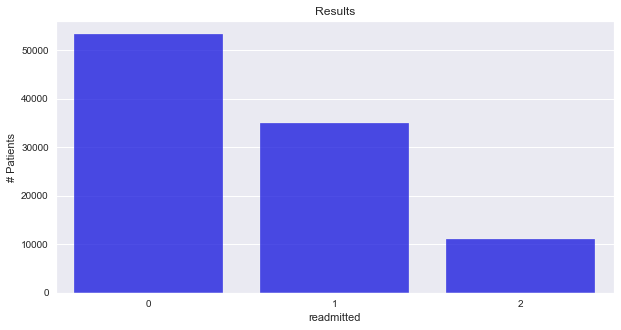

In [64]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(y2, alpha=.80, color='blue')
plt.title('Results')
plt.ylabel('# Patients')
plt.show()

In [63]:
y2 = y2.replace({'no': 0, 'over_30_days': 1, 'under_30_days': 2})

In [ ]:
y3 = y2.replace({2:1})

In [ ]:
y3 = y2

In [ ]:
y2 = y3

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=23)

dummy = DummyClassifier(strategy='most_frequent', random_state=13).fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred))
print('Test F1 score: ', f1_score(y_test, dummy_pred, average='micro'))
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(dummy, classes=[0,1,2])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test Accuracy score:  0.5667591364129779
Test F1 score:  0.5667591364129779


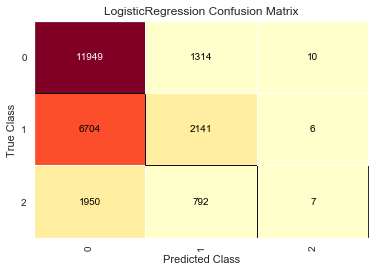

In [68]:
# dt_clf = DecisionTreeClassifier(max_depth=5)
lr_clf = LogisticRegression(solver='liblinear', random_state=13)

# dt_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

# y_pred_test = dt_clf.predict(X_test)
y_pred_test = lr_clf.predict(X_test)




# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test, average='micro'))

#checking confusion matrix
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(lr_clf, classes=[0,1,2])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [ ]:
y2

In [69]:
training  = pd.concat([X_train, y_train], axis=1)

training.columns

training.readmitted.value_counts()

no = training[training.readmitted==0]
over_30 = training[training.readmitted==1]
under_30 = training[training.readmitted==2]

print('no count: '+ str(len(no)))
print('over_30 count: '+ str(len(over_30)))
print('under_30 count: '+ str(len(under_30)))

In [82]:
# upsample minority
over_30_upsampled = resample(over_30,
                             replace=True,  # sample with replacement
                             # match number in majority class
                             n_samples=len(no),
                             random_state=23)  # reproducible results

In [83]:
# upsample minority
under_30_upsampled = resample(under_30,
                              replace=True,  # sample with replacement
                              # match number in majority class
                              n_samples=len(no),
                              random_state=23)  # reproducible results

In [87]:
upsampled = pd.concat([no, over_30_upsampled, under_30_upsampled])

upsampled.readmitted.value_counts()

2    40042
1    40042
0    40042
Name: readmitted, dtype: int64

In [ ]:
y2.value_counts()

C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test Accuracy score:  0.4761789892654686
Test F1 score:  0.4761789892654686


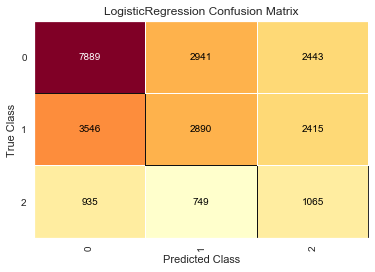

In [88]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.readmitted
X_train = upsampled.drop('readmitted', axis=1)


# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train, y_train)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred, average='micro'))

#checking confusion matrix
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(upsampled_lr, classes=[0,1,2])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [89]:
no_downsampled = resample(no,
                          replace=False,  # sample without replacement
                          # match minority n
                          n_samples=len(over_30)+len(under_30),
                          random_state=23)  # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_downsampled, over_30, under_30])

# checking counts
downsampled.readmitted.value_counts()

C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test Accuracy score:  0.5671611787882442
Test F1 score:  0.5671611787882442


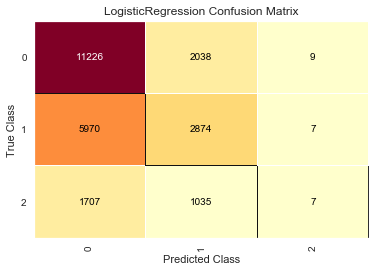

In [91]:
# trying logistic regression again with the balanced dataset
y_train = downsampled.readmitted
X_train = downsampled.drop('readmitted', axis=1)


# downsampled_dt = DecisionTreeClassifier(max_depth=5)
downsampled_lr = LogisticRegression(solver='liblinear')


# downsampled_dt.fit(X_train, y_train)
downsampled_lr.fit(X_train, y_train)


# downsampled_pred = upsampled_dt.predict(X_test)
downsampled_pred = downsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, downsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, downsampled_pred, average='micro'))

#checking confusion matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(downsampled_lr, classes=[0,1,2])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [93]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=23)

sm = SMOTE(random_state=23, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

In [95]:
y3 = y2.replace({2:1})

Test Accuracy score:  0.5336308446910304


C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Test F1 score:  0.0


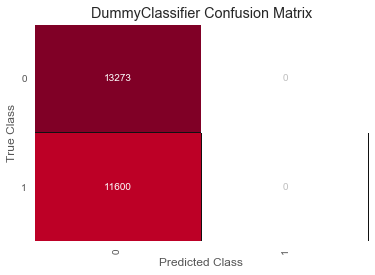

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X2, y3, test_size=0.25, random_state=23)

dummy = DummyClassifier(strategy='most_frequent', random_state=13).fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred))
print('Test F1 score: ', f1_score(y_test, dummy_pred))
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(dummy, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

Test Accuracy score:  0.6160897358581594
Test F1 score:  0.5078088758311426


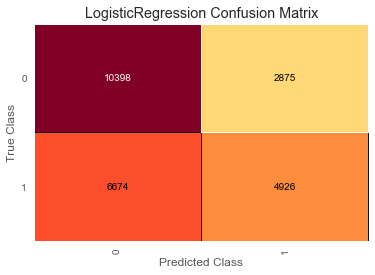

In [98]:
# dt_clf = DecisionTreeClassifier(max_depth=5)
lr_clf = LogisticRegression(solver='liblinear', random_state=13)

# dt_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

# y_pred_test = dt_clf.predict(X_test)
y_pred_test = lr_clf.predict(X_test)




# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test))

#checking confusion matrix
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(lr_clf, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [99]:
training  = pd.concat([X_train, y_train], axis=1)

training.columns

training.readmitted.value_counts()

no = training[training.readmitted==0]
yes = training[training.readmitted==1]

print('no count: '+ str(len(no)))
print('yes count: '+ str(len(yes)))

no count: 40042
yes count: 34576


In [103]:
# upsample minority
yes_upsampled = resample(yes,
                         replace=True,  # sample with replacement
                         # match number in majority class
                         n_samples=len(no),
                         random_state=23)  # reproducible results

In [104]:
upsampled = pd.concat([no, yes_upsampled])
upsampled.readmitted.value_counts()

1    40042
0    40042
Name: readmitted, dtype: int64

Test Accuracy score:  0.6164515739958991
Test F1 score:  0.5659295659295659


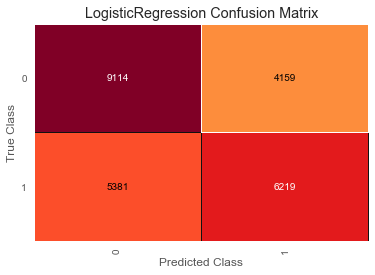

In [106]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.readmitted
X_train = upsampled.drop('readmitted', axis=1)


# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train, y_train)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred))

#checking confusion matrix
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(upsampled_lr, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [107]:
no_downsampled = resample(no,
                          replace=False,  # sample without replacement
                          # match minority n
                          n_samples=len(yes),
                          random_state=23)  # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_downsampled, yes])

# checking counts
downsampled.readmitted.value_counts()

1    34576
0    34576
Name: readmitted, dtype: int64

Test Accuracy score:  0.6176174968841716
Test F1 score:  0.5661238082204278


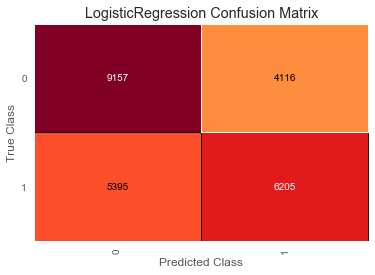

In [108]:
y_train = downsampled.readmitted
X_train = downsampled.drop('readmitted', axis=1)


# downsampled_dt = DecisionTreeClassifier(max_depth=5)
downsampled_lr = LogisticRegression(solver='liblinear')


# downsampled_dt.fit(X_train, y_train)
downsampled_lr.fit(X_train, y_train)


# downsampled_pred = upsampled_dt.predict(X_test)
downsampled_pred = downsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, downsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, downsampled_pred))

#checking confusion matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(downsampled_lr, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [109]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X2, y3, test_size=0.25, random_state=23)

sm = SMOTE(random_state=23, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

Test Accuracy score:  0.6099786917541109
Test F1 score:  0.5227999409710266


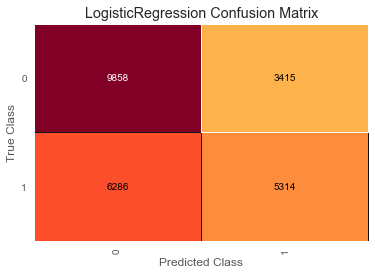

In [110]:
# smote_dt = DecisionTreeClassifier(max_depth=5)
smote_lr = LogisticRegression(solver='liblinear')


# smote_dt.fit(X_train, y_train)
smote_lr.fit(X_train, y_train)


# smote_pred = smote_dt.predict(X_test)
smote_pred = smote_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, smote_pred))

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(smote_lr, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()